In [346]:
#!pip install torch torchvision
#!pip install tensorflow


# MNIST — DATA

## Step 1: Import libraries


In [347]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # just to load the data as raw NumPy arrays

## Step 2: Load raw MNIST data (60k train, 10k test)

In [348]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Step 3: Explore data shapes


In [ ]:
print("Training data shape:", X_train.shape)   
print("Training labels shape:", y_train.shape) 
print("Test data shape:", X_test.shape)  
print("Test labels shape:", y_test.shape)     

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


## Step 4: Inspect a single image (raw values)


In [ ]:
index = 10  # Change this index to view different images
print("Label:", y_train[index])
print("Pixel values:\n", X_train[index])  # Each pixel is a value between 0 and 255

Label: 3
Pixel values:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   

## Step 5: Display some digits


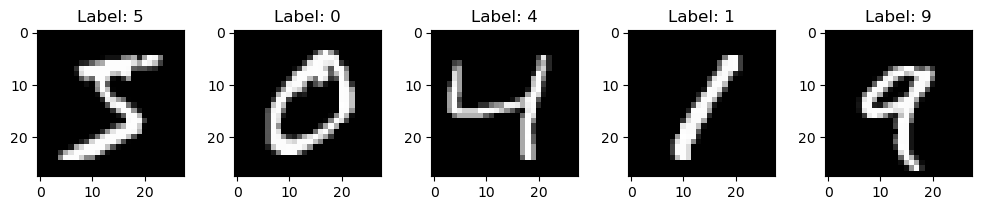

In [ ]:
plt.figure(figsize=(10, 2))

for index in range(5): # let's visualize the first 5 images of the training set
    plt.subplot(1, 5, index + 1) 
    plt.imshow(X_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")

plt.tight_layout()
plt.show()

# MNIST – PREPROCESSING

## Step 1 : Flatten images

In [352]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)  # Flatten the images
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [353]:
# X_train.reshape(X_train.shape[0], -1) = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

In [354]:
print("Flattened training data shape:", X_train_flatten.shape)
print("Flattened test data shape:", X_test_flatten.shape)

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


## Step 2 : Normalize images

In [355]:
max_value = np.max(X_train)
print("Max pixel value in training data:", max_value)

Max pixel value in training data: 255


In [356]:
X_train_normalized = X_train_flatten / max_value
X_test_normalized = X_test_flatten / max_value

In [357]:
print("Example of normalized training data:", X_train_normalized[0][100:200]) # Displaying a slice of the first normalized image

Example of normalized training data: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01176471 0.07058824
 0.07058824 0.07058824 0.49411765 0.53333333 0.68627451 0.10196078
 0.65098039 1.         0.96862745 0.49803922 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.11764706 0.14117647
 0.36862745 0.60392157 0.66666667 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.88235294 0.6745098  0.99215686 0.94901961
 0.76470588 0.25098039 0.         0.  

In [358]:
# Final input to the model
X_train_input = X_train_normalized
X_test_input = X_test_normalized

In [ ]:
# one-hot encoding the labels
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)
print("One-hot encoded training labels shape:", y_train_one_hot.shape)
print("One-hot encoded test labels shape:", y_test_one_hot.shape)

# Displaying the first 5 one-hot encoded labels
print("First 5 one-hot encoded training labels:\n", y_train_one_hot[:5])

One-hot encoded training labels shape: (60000, 10)
One-hot encoded test labels shape: (10000, 10)
First 5 one-hot encoded training labels:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [360]:
y_train_input = y_train_one_hot
y_test_input = y_test_one_hot

# MNIST – MLP MODEL

In [361]:
from tensorflow.keras.models import Sequential  # Sequential model for building the neural network
from tensorflow.keras.layers import Input       # Input layer for the model
from tensorflow.keras.layers import Dense       # Dense layer for fully connected layers

In [362]:
X_train_input.shape

(60000, 784)

In [ ]:
model = Sequential([
    Input(shape=(X_train_input.shape[1],)),     # input layer properly defined
    Dense(128, activation='relu'),              # hidden layer with 128 neurons
    Dense(64, activation='relu'),               # hidden layer with 64 neurons
    Dense(10, activation='softmax')             # output layer for 10 classes (digits 0-9)
])

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',          # categorical crossentropy for multi-class classification
    optimizer = 'sgd',                          # stochastic gradient descent optimizer
    metrics = ['accuracy']                      # metrics to track during training
)

# MNIST – TRAINING 

In [365]:
print(X_train_input.shape)  # doit être (60000, 784)
print(y_train_input.shape)  # doit être (60000, 10)

(60000, 784)
(60000, 10)


In [366]:
history = model.fit(
    X_train_input, y_train_input,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.6991 - loss: 1.1059 - val_accuracy: 0.9208 - val_loss: 0.2830
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.9090 - loss: 0.3157 - val_accuracy: 0.9327 - val_loss: 0.2298
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.9254 - loss: 0.2584 - val_accuracy: 0.9462 - val_loss: 0.1932
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9384 - loss: 0.2180 - val_accuracy: 0.9550 - val_loss: 0.1631
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.9441 - loss: 0.1913 - val_accuracy: 0.9608 - val_loss: 0.1452
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.9505 - loss: 0.1709 - val_accuracy: 0.9635 - val_loss: 0.1354
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.9552 - loss: 0.1554 - val_accuracy: 0.9643 - val_loss: 0.1268
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.9591 -

In [367]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


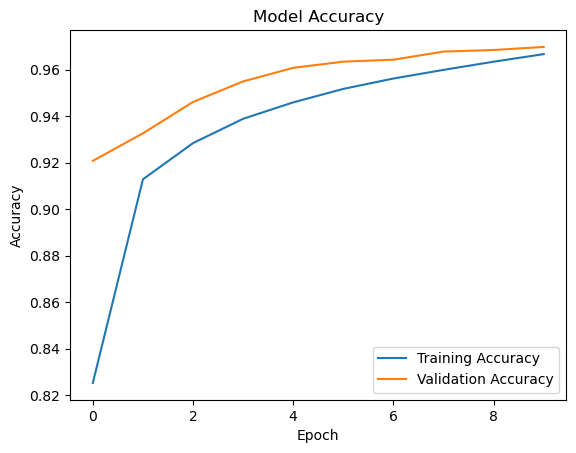

In [368]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

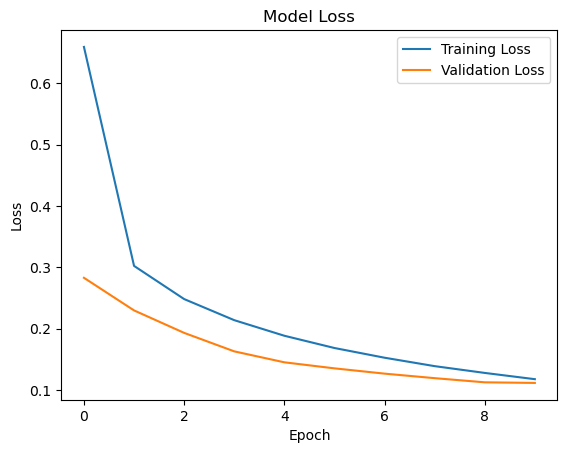

In [369]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# MNIST – EVALUATION

In [372]:
test_loss, test_acc = model.evaluate(X_test_input, y_test_input)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9574 - loss: 0.1512


pourquoi 313 ? (batch size)

In [373]:
print(test_loss, test_acc)

0.128983274102211 0.9625999927520752


# MNIST – METRICS

In [412]:
true_label = np.argmax(y_test_input, axis=1)
predictions = model.predict(X_test_input)
predicted_label = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


In [413]:
errors = np.where(true_label != predicted_label)[0]
print(errors)

[   8  149  241  247  259  320  321  340  358  381  412  445  448  449
  495  543  551  582  591  659  684  691  707  717  720  740  810  813
  844  874  947  951  956  965  982 1003 1014 1032 1039 1044 1068 1101
 1107 1112 1128 1181 1182 1194 1204 1226 1232 1242 1247 1260 1283 1299
 1319 1325 1326 1328 1364 1378 1414 1429 1433 1444 1469 1494 1500 1522
 1527 1530 1549 1553 1569 1609 1621 1640 1671 1681 1709 1717 1751 1754
 1773 1790 1800 1850 1878 1901 1911 1938 1940 1941 1952 2016 2024 2035
 2040 2043 2044 2053 2068 2070 2098 2109 2118 2129 2135 2182 2185 2186
 2189 2266 2272 2293 2299 2325 2326 2329 2380 2387 2395 2405 2406 2414
 2422 2433 2488 2514 2526 2545 2548 2598 2607 2648 2654 2720 2730 2760
 2863 2877 2896 2925 2927 2939 2945 2953 2979 3005 3060 3073 3115 3117
 3206 3284 3369 3422 3490 3503 3520 3533 3549 3558 3559 3567 3597 3629
 3664 3674 3702 3718 3751 3757 3767 3778 3780 3806 3808 3811 3818 3821
 3838 3848 3853 3855 3869 3893 3902 3906 3926 3941 3943 3951 3968 3976
 3985 

8


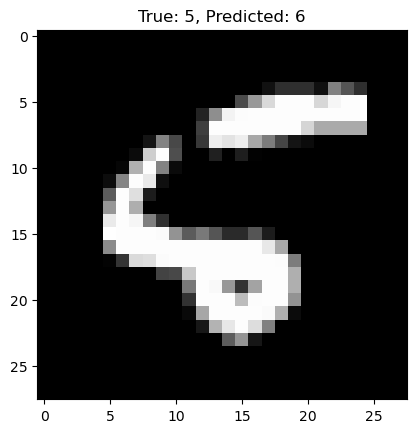

In [ ]:
print(errors[0])
plt.imshow(X_test[errors[0]], cmap='gray')
plt.title(f"True: {true_label[errors[0]]}, Predicted: {predicted_label[errors[0]]}")
plt.show()

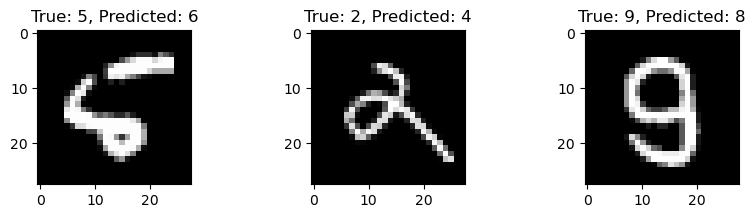

In [ ]:
plt.figure(figsize=(10, 2))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_test[errors[i]], cmap='gray')
    plt.title(f"True: {true_label[errors[i]]}, Predicted: {predicted_label[errors[i]]}")
plt.show()

In [411]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [414]:
print(true_label)

[7 2 1 ... 4 5 6]


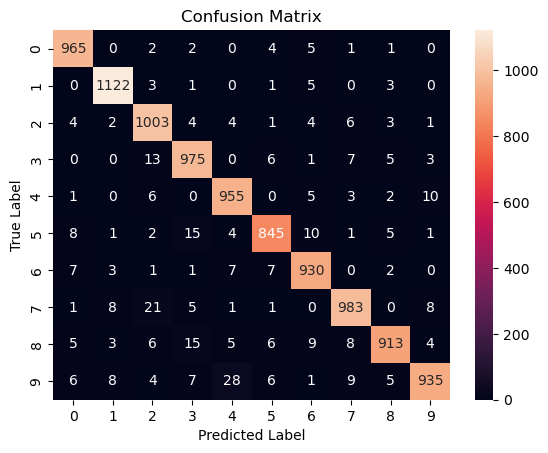

In [417]:
matrix = confusion_matrix(true_label, predicted_label)
sns.heatmap(matrix, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()